### Import Relevant Libraries and Load Data

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data from the provided Excel file
file_path = "PowerPlantsintheU_Export_TableToExcel.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
# Then inspect the data to understand what features it contains.
# And also to try determine the relevant features for clustering.
data.head(4)


,OBJECTID_1,OBJECTID,Plant_Code,Plant_Name,Utility_ID,Utility_Na,sector_nam,Street_Add,City,County,...,NG_MW,Nuclear_MW,Crude_MW,Solar_MW,Wind_MW,Other_MW,Source,Period,Longitude,Latitude
0,1,13170,4068,Merrill,20860,Wisconsin Public Service Corp,Electric Utility,306 S Park St,Merrill,Lincoln,...,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-89.6850,45.1786
1,2,13171,4071,Potato Rapids,20860,Wisconsin Public Service Corp,Electric Utility,N4295 Potato Rapids Rd,Town of Porterfield,Marinette,...,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-87.7586,45.1136
2,3,13172,4072,Pulliam,20860,Wisconsin Public Service Corp,Electric Utility,1530 N Bylsby Av,Green Bay,Brown,...,79.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-88.0086,44.5400
3,4,13173,4074,Sandstone Rapids,20860,Wisconsin Public Service Corp,Electric Utility,N7633 Sandstone Lane,Town of Stephenson,Marinette,...,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-88.0678,45.2333


### Preprocessing

In [3]:
# We check to see if there are missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12008 entries, 0 to 12007
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID_1  12008 non-null  int64  
 1   OBJECTID    12008 non-null  int64  
 2   Plant_Code  12008 non-null  int64  
 3   Plant_Name  12008 non-null  object 
 4   Utility_ID  12008 non-null  int64  
 5   Utility_Na  12008 non-null  object 
 6   sector_nam  12008 non-null  object 
 7   Street_Add  11947 non-null  object 
 8   City        12005 non-null  object 
 9   County      12008 non-null  object 
 10  State       12008 non-null  object 
 11  Zip         12008 non-null  int64  
 12  PrimSource  12008 non-null  object 
 13  source_des  12008 non-null  object 
 14  tech_desc   12008 non-null  object 
 15  Install_MW  12008 non-null  float64
 16  Total_MW    12008 non-null  float64
 17  Bat_MW      12008 non-null  float64
 18  Bio_MW      12008 non-null  float64
 19  Coal_MW     12008 non-nul

In [ ]:
# The dataset contains several columns, including:
    # identifiers,
    # plant names,
    # utility information,
    # location details, and 
    # various metrics for energy production (e.g., capacity in megawatts for different energy sources like coal, natural gas, nuclear, solar, wind).

# For our KMeans clustering analysis, we could focus on features that represent the power plant characteristics,
# Such as the capacities for different energy sources (Coal_MW, NG_MW, Nuclear_MW, Solar_MW, Wind_MW, etc.) and 
# Possibly geographical location (Longitude, Latitude) to see if there are any regional patterns.


In [ ]:
# From the .info(), we see just the "Street_Add" and "City" contain missing values. We don't need these in our analysis

### KMeans Clustering

In [ ]:
# We will apply KMeans clustering to identify patterns or groupings among the power plants.
# Then visualize the results using appropriate plots and provide short explanations for each figure.

# The data will be selected and standardized, focusing on the:
    # capacities for different energy sources and 
    # the geographical location of the power plants.
# This standardization process ensures that each feature contributes equally to the distance calculations used in clustering.

# To decide on the number of clusters, I'll use the Elbow Method:
    # This involves plotting the sum of squared distances of samples to their closest cluster center for a range of clusters
    # And looking for the "elbow" point where the rate of decrease sharply changes.

In [5]:
# Selecting relevant features for clustering
features = ['Coal_MW', 'NG_MW', 'Nuclear_MW', 'Solar_MW', 'Wind_MW', 'Longitude', 'Latitude']
data_selected = data[features]

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Display the first four rows of the scaled data to verify
pd.DataFrame(data_scaled, columns=features).head(4)


,Coal_MW,NG_MW,Nuclear_MW,Solar_MW,Wind_MW,Longitude,Latitude
0,-0.103418,-0.230214,-0.062357,-0.246168,-0.239437,0.210536,1.116002
1,-0.103418,-0.230214,-0.062357,-0.246168,-0.239437,0.315219,1.104530
2,-0.103418,0.201341,-0.062357,-0.246168,-0.239437,0.301634,1.003301
3,-0.103418,-0.230214,-0.062357,-0.246168,-0.239437,0.298417,1.125655


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

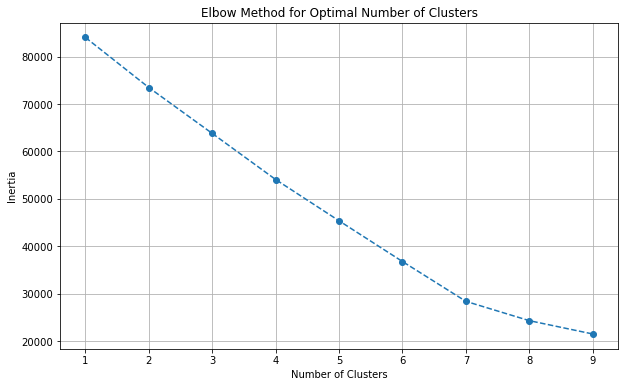

In [6]:
# Let's find the optimal number of clusters and then proceed with the clustering
# Determining the optimal number of clusters using the Elbow Method
inertia = []
range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
# The elbow curve suggests that the rate of decrease in inertia begins to slow after 7 clusters
# Indicating that that could be a reasonable choice for the number of clusters to use in our analysis.

# Given this observation and to keep the analysis simple and interpretable, I'll proceed with 7 clusters for the KMeans clustering.
# This choice strikes a balance between capturing variability in the data and maintaining the number of groups for analysis.


### Apply KMeans clustering with 7 clusters to the standardized data and visualize the results. 

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Temp/ipykernel_6976/1893981911.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['Cluster'] = clusters


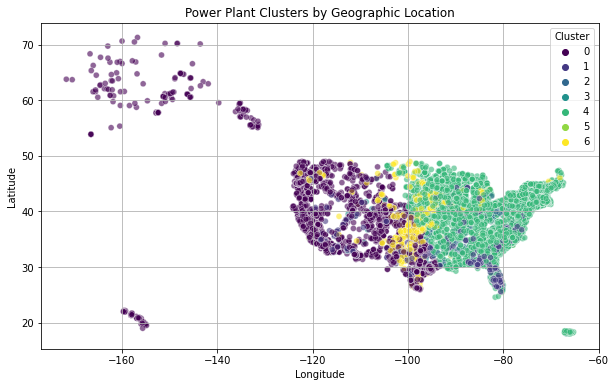

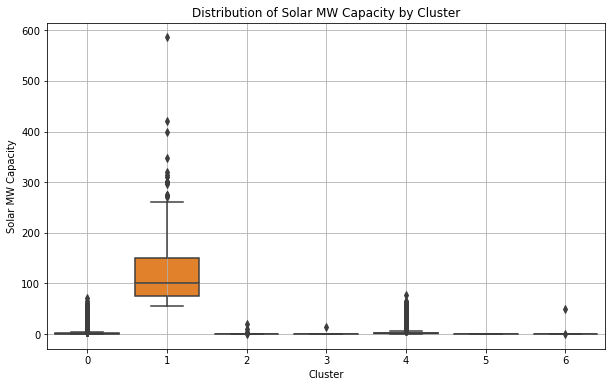

In [16]:
# Applying KMeans clustering with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Adding the cluster labels to our selected dataset for visualization
data_selected['Cluster'] = clusters

# Visualizing the clusters based on two dimensions: Longitude and Latitude to see geographical patterns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_selected, x='Longitude', y='Latitude', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Power Plant Clusters by Geographic Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Additionally, visualize the distribution of a few key features (e.g., Solar_MW, Nuclear_MW) across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Solar_MW', data=data_selected)
plt.title('Distribution of Solar MW Capacity by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Solar MW Capacity')
plt.grid(True)
plt.show()


In [ ]:
# Power Plant Clusters by Geographic Location:
# This scatter plot aims to display the geographical distribution of power plants, categorized into three clusters.
# Each cluster is represented by a different color, helping us identify if there are regional patterns in the clustering.

# Distribution of Solar MW Capacity by Cluster:
# A boxplot intended to reveal how solar power capacity (measured in megawatts) varies across the identified clusters.
# This could help understand if certain clusters are characterized by higher or lower solar energy production capacities.


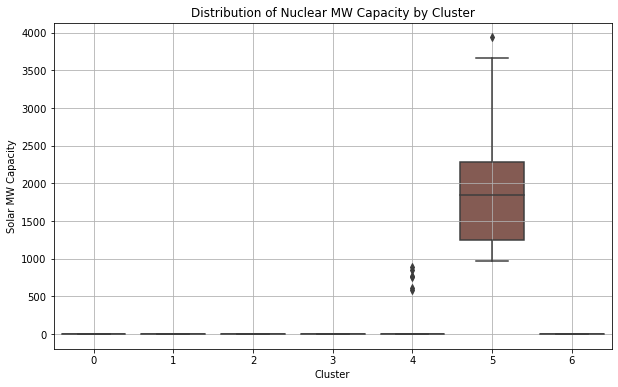

In [20]:
# Examine visualization for Nuclear MW

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Nuclear_MW', data=data_selected)
plt.title('Distribution of Nuclear MW Capacity by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Solar MW Capacity')
plt.grid(True)
plt.show()


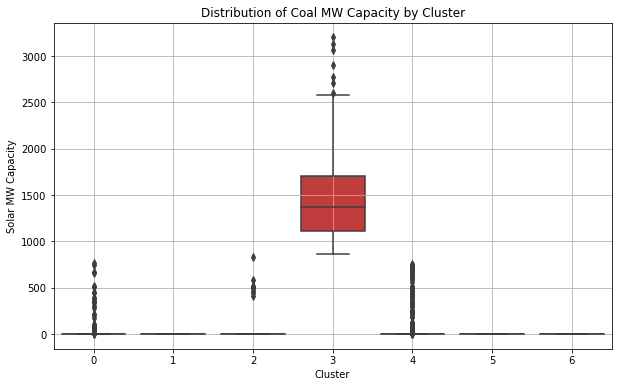

In [21]:
# Examine visualizations for Coal MW

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Coal_MW', data=data_selected)
plt.title('Distribution of Coal MW Capacity by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Solar MW Capacity')
plt.grid(True)
plt.show()


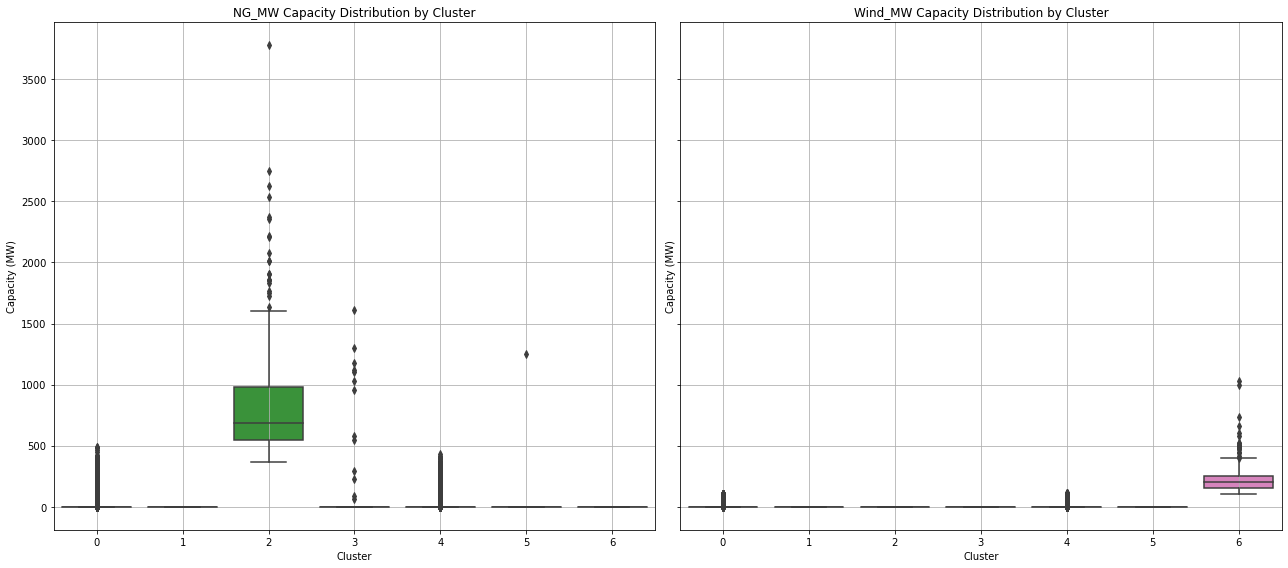

In [22]:
# Visualize the clusters of the capacity distributions for the others: NG and Wind

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
energy_sources = ["NG_MW", "Wind_MW"]

for ax, energy_source in zip(axes, energy_sources):
    sns.boxplot(ax=ax, x='Cluster', y=energy_source, data=data_selected)
    ax.set_title(f'{energy_source} Capacity Distribution by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Capacity (MW)')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# These visualizations would provide insights into:
# How power plants are geographically grouped based on the selected features (e.g., energy source capacities and location).
# The variability in solar power capacity among different clusters,
# Potentially indicating specialization or focus on solar energy in certain regions or by certain types of power plants